In [75]:
import sys
from pathlib import Path
import numpy as np
import sys
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [76]:
# Ensure project root is in sys.path
project_root = Path.cwd().parent  # parent of "notebooks"
sys.path.insert(0, str(project_root))

print("Project root:", project_root)
print("ts_boilerplate exists:", (project_root / "ts_boilerplate").exists())

# Import dataprep
from ts_boilerplate.dataprep import (
    build_feature_dataset,
    TARGET_TICKER,
    SUPPORT_TICKERS,
    START_DATE,
    END_DATE,
    HORIZON
)

Project root: /Users/arnaudthomas/code/bennystu/Trend-Surgeon/Trend-Surgeon-Time-Series
ts_boilerplate exists: True


In [77]:
df_final = build_feature_dataset(
    target=TARGET_TICKER,
    support_tickers=SUPPORT_TICKERS,
    start_date=START_DATE,
    end_date=END_DATE,
    horizon=HORIZON,
    markdown_output_path=None
)

print("Final dataset shape:", df_final.shape)
df_final.head()

Safe fetch window: 2013-12-16 → 2025-09-12


Data prepared. Shape after safe fetch: (2952, 10)


(2952, 10)
(2952, 10)
Registered feature: target_close with shift: no_shift
Registered feature: XPH_Open with shift: no_shift
Registered feature: XPH_High with shift: shift_1
Registered feature: XPH_Low with shift: shift_1
Registered feature: XPH_Close with shift: shift_1
Registered feature: XPH_Volume with shift: shift_1
Registered feature: PPH_Open with shift: no_shift
Registered feature: PPH_High with shift: shift_1
Registered feature: PPH_Low with shift: shift_1
Registered feature: PPH_Close with shift: shift_1
Registered feature: PPH_Volume with shift: shift_1
FINAL REGISTRY: {'target_close': 'no_shift', 'XPH_Open': 'no_shift', 'XPH_High': 'shift_1', 'XPH_Low': 'shift_1', 'XPH_Close': 'shift_1', 'XPH_Volume': 'shift_1', 'PPH_Open': 'no_shift', 'PPH_High': 'shift_1', 'PPH_Low': 'shift_1', 'PPH_Close': 'shift_1', 'PPH_Volume': 'shift_1'}


Per-ticker technicals: 100%|██████████| 2/2 [00:00<00:00, 189.12it/s]
PCA failed: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='covariance_eigh'


Registered feature: PPH_Return_1d with shift: shift_1
Registered feature: PPH_Return_5d with shift: shift_1
Registered feature: PPH_Return_10d with shift: shift_1
Registered feature: PPH_Return_20d with shift: shift_1
Registered feature: PPH_SMA_10 with shift: shift_1
Registered feature: PPH_EMA_20 with shift: shift_1
Registered feature: PPH_MACD with shift: shift_1
Registered feature: PPH_MACD_sig with shift: shift_1
Registered feature: PPH_MACD_hist with shift: shift_1
Registered feature: PPH_RSI_14 with shift: shift_1
Registered feature: PPH_StochK with shift: shift_1
Registered feature: PPH_StochD with shift: shift_1
Registered feature: PPH_Vol_20 with shift: shift_1
Registered feature: PPH_Parkinson_20 with shift: shift_1
Registered feature: PPH_GK_20 with shift: shift_1
Registered feature: PPH_BB_width with shift: shift_1
Registered feature: PPH_Volume_ROC with shift: shift_1
Registered feature: PPH_Volume_Z with shift: shift_1
Registered feature: PPH_OBV with shift: shift_1
Regi

,XPH_Open,XPH_High_t-1,XPH_Low_t-1,XPH_Close_t-1,XPH_Volume_t-1,PPH_Open,PPH_High_t-1,PPH_Low_t-1,PPH_Close_t-1,PPH_Volume_t-1,...,XPH_Vol_20_t-1,XPH_Parkinson_20_t-1,XPH_GK_20_t-1,XPH_BB_width_t-1,XPH_Volume_ROC_t-1,XPH_Volume_Z_t-1,XPH_OBV_t-1,XPH_Entropy_20_t-1,XPH_Ratio_PPH_t-1,XPH_RS_20_t-1
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-04,44.595001,45.965000,44.209999,44.325001,391200.0,53.450001,54.500000,53.099998,53.160000,68300.0,...,0.015173,0.000113,-0.000012,0.046057,0.293651,0.545552,-1313200.0,0.004380,0.833804,0.003008
2014-02-05,44.430000,44.820000,44.215000,44.490002,180200.0,53.799999,53.700001,53.369999,53.680000,117000.0,...,0.015042,0.000112,-0.000007,0.042675,0.187088,-0.540276,-1133000.0,0.004325,0.828800,0.002707
2014-02-06,44.610001,44.509998,43.535000,44.299999,184400.0,53.959999,53.959999,53.450001,53.840000,40400.0,...,0.014957,0.000119,0.000005,0.041560,0.237584,-0.549047,-1317400.0,0.004254,0.822808,-0.002859
2014-02-07,44.419998,44.775002,43.970001,44.195000,76800.0,54.200001,54.090000,53.790001,53.959999,24200.0,...,0.014541,0.000122,0.000011,0.043063,-0.906999,-1.086777,-1394200.0,0.004021,0.819033,-0.012822
2014-02-10,45.424999,45.349998,44.244999,45.349998,186800.0,55.029999,54.959999,54.139999,54.959999,36100.0,...,0.015549,0.000130,0.000002,0.042842,-0.409235,-0.539708,-1207400.0,0.004596,0.825146,-0.008098


In [78]:
# ================================================
# 3. CREATE TRUE TARGET FUTURE (t + HORIZON)
# ================================================
H = HORIZON  # reuse horizon defined in dataprep

df_final["target_close_future"] = df_final["target_close"].shift(-H)

# Remove rows with no future value
df_final = df_final.dropna(subset=["target_close_future"])

print("Dataset after adding future target:", df_final.shape)
df_final[["target_close", "target_close_future"]].head()

Dataset after adding future target: (2861, 77)


,target_close,target_close_future
Date,,
2014-02-04,53.680000,58.900002
2014-02-05,53.840000,58.660000
2014-02-06,53.959999,57.889999
2014-02-07,54.959999,57.230000
2014-02-10,55.349998,57.740002


In [79]:
# ================================================
# 4. EXTRACT X AND y FOR MODELING
# ================================================
target_col = "target_close_future"

y = df_final[target_col].values
X = df_final.drop(columns=[target_col]).values

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2861, 76)
y shape: (2861,)


In [80]:
dates = df_final.index
dates_train = dates[:split_idx]
dates_val   = dates[split_idx:]

In [81]:
# ================================================
# 5. TIME-BASED TRAIN/VAL SPLIT
# ================================================
split_idx = int(0.8 * len(X))

X_train = X[:split_idx]
y_train = y[:split_idx]
X_val   = X[split_idx:]
y_val   = y[split_idx:]

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)

Train size: (2288, 76)
Validation size: (573, 76)


In [82]:
# ================================================
# 6. GRID SEARCH XGBOOST
# ================================================
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

learning_rates    = [0.01, 0.1]
n_estimators_list = [100, 200]
max_depths        = [3, 6]
subsamples        = [0.8, 1.0]

best_loss = float("inf")
best_model = None
best_config = None

for lr in learning_rates:
    for n_est in n_estimators_list:
        for depth in max_depths:
            for subs in subsamples:

                print(f"Training: lr={lr}, n={n_est}, depth={depth}, subs={subs}")

                model = XGBRegressor(
                    learning_rate=lr,
                    n_estimators=n_est,
                    max_depth=depth,
                    subsample=subs,
                    objective="reg:squarederror",
                    tree_method="hist"
                )

                model.fit(X_train, y_train)

                y_pred = model.predict(X_val)
                loss = mean_squared_error(y_val, y_pred)

                if loss < best_loss:
                    best_loss = loss
                    best_model = model
                    best_config = {
                        "learning_rate": lr,
                        "n_estimators": n_est,
                        "max_depth": depth,
                        "subsample": subs
                    }

print("\n🔥 Best configuration:", best_config)
print("📉 Best validation MSE:", best_loss)

Training: lr=0.01, n=100, depth=3, subs=0.8
Training: lr=0.01, n=100, depth=3, subs=1.0
Training: lr=0.01, n=100, depth=6, subs=0.8
Training: lr=0.01, n=100, depth=6, subs=1.0
Training: lr=0.01, n=200, depth=3, subs=0.8
Training: lr=0.01, n=200, depth=3, subs=1.0
Training: lr=0.01, n=200, depth=6, subs=0.8
Training: lr=0.01, n=200, depth=6, subs=1.0
Training: lr=0.1, n=100, depth=3, subs=0.8
Training: lr=0.1, n=100, depth=3, subs=1.0
Training: lr=0.1, n=100, depth=6, subs=0.8
Training: lr=0.1, n=100, depth=6, subs=1.0
Training: lr=0.1, n=200, depth=3, subs=0.8
Training: lr=0.1, n=200, depth=3, subs=1.0
Training: lr=0.1, n=200, depth=6, subs=0.8
Training: lr=0.1, n=200, depth=6, subs=1.0

🔥 Best configuration: {'learning_rate': 0.1, 'n_estimators': 200, 'max_depth': 3, 'subsample': 1.0}
📉 Best validation MSE: 135.2886130496905


In [83]:
# ================================================
# 7. FINAL PREDICTION FOR t + HORIZON
# ================================================
last_features = X[-1].reshape(1, -1)
future_prediction = best_model.predict(last_features)[0]

print(f"\n📈 Forecast for t+{HORIZON} days:", future_prediction)


📈 Forecast for t+30 days: 76.63676


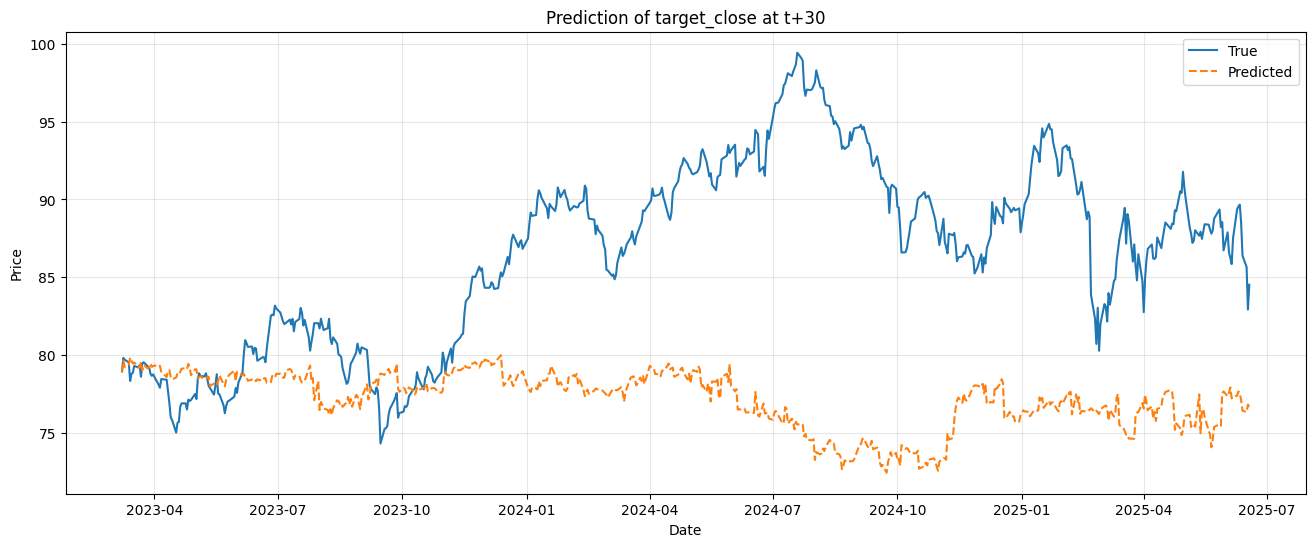

In [84]:
plt.figure(figsize=(16,6))
plt.plot(dates_val, y_val, label="True")
plt.plot(dates_val, y_pred_val, label="Predicted", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title(f"Prediction of target_close at t+{HORIZON}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()